In [24]:
from rouge_score import rouge_scorer
from pathlib import Path
import pandas as pd
from bert_score import score as bert_scorer
from nltk.translate.bleu_score import sentence_bleu


DATA_PATH = Path("../data")
OMI_PATH_predicted = DATA_PATH / "predicted" / "omi-health"


In [25]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

In [26]:
def calculate_rouge_scores(row):
    reference_text = str(row['soap'])
    generated_text = str(row['generated_soap_note'])

    # Ensure texts are not empty or NaN, which can cause errors
    if not reference_text or not generated_text or pd.isna(reference_text) or pd.isna(generated_text):
        return {'rouge1_precision': None, 'rouge1_recall': None, 'rouge1_fmeasure': None,
                'rouge2_precision': None, 'rouge2_recall': None, 'rouge2_fmeasure': None,
                'rougeL_precision': None, 'rougeL_recall': None, 'rougeL_fmeasure': None}

    scores = scorer.score(reference_text, generated_text)

    # Extracting precision, recall, and f-measure for each ROUGE type
    return {
        'rouge1_precision': scores['rouge1'].precision,
        'rouge1_recall': scores['rouge1'].recall,
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_precision': scores['rouge2'].precision,
        'rouge2_recall': scores['rouge2'].recall,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_precision': scores['rougeL'].precision,
        'rougeL_recall': scores['rougeL'].recall,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

In [27]:
test_df = pd.read_csv(OMI_PATH_predicted / "test_v1.csv")
test_df

,dialogue,soap,prompt,messages,messages_nosystem,event_tags,generated_soap_note
0,"Doctor: Hello, can you please tell me about yo...","S: The patient, a flooring installer with no s...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],S: The patient reports experiencing painless b...
1,"Doctor: Hello, I understand that you're a 7-ye...",S: The patient is a 7-year-old boy with congen...,Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],S: The patient is a 7-year-old male with conge...
2,"Doctor: Hello, we've received your results fro...",S: The patient reported undergoing an ultrasou...,Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],S: The patient reports a single thyroid nodule...
3,"Doctor: Hello, can you tell me what brought yo...","S: The patient reports a progressive headache,...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],"S: The patient reports progressive headache, n..."
4,"Doctor: Hello, I understand that you have been...","S: The patient, a post-liver transplant recipi...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],"S: The patient, diagnosed with hepatocellular ..."
...,...,...,...,...,...,...,...
245,"Doctor: Hello, how can I help you today?\nPati...","S: The patient reports experiencing ataxia, tr...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],"S: The patient reports experiencing ataxia, tr..."
246,"Doctor: Hello, I'm Dr. Smith. How can I help y...","S: Patient reports abdominal pain for 2 weeks,...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],S: The patient reports experiencing abdominal ...
247,"Doctor: Hi there, I see that you've presented ...","S: The patient, a 10-year post-diagnosis breas...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],S: The patient reports experiencing nausea and...
248,"Doctor: Hello, I understand that you were diag...","S: The patient, previously diagnosed with infe...",Create a medical SOAP summary of this dialogue.,"[{'role': 'system', 'content': 'You are an exp...","[{'role': 'user', 'content': ""You are an exper...",[],"S: The patient, diagnosed with infectious cerv..."


In [28]:
# Assuming your DataFrame with generated notes is called test_df
rouge_results = test_df.apply(calculate_rouge_scores, axis=1, result_type='expand')

# Join the ROUGE scores back to your original DataFrame
test_df = test_df.join(rouge_results)

In [32]:
average_rouge1_fmeasure = test_df['rouge1_fmeasure'].mean()
average_rouge2_fmeasure = test_df['rouge2_fmeasure'].mean()
average_rougeL_fmeasure = test_df['rougeL_fmeasure'].mean()

average_rouge1_precision = test_df['rouge1_precision'].mean()
average_rouge2_precision = test_df['rouge2_precision'].mean()
average_rougeL_precision = test_df['rougeL_precision'].mean()

average_rouge1_recall = test_df['rouge1_recall'].mean()
average_rouge2_recall = test_df['rouge2_recall'].mean()
average_rougeL_recall = test_df['rougeL_recall'].mean()


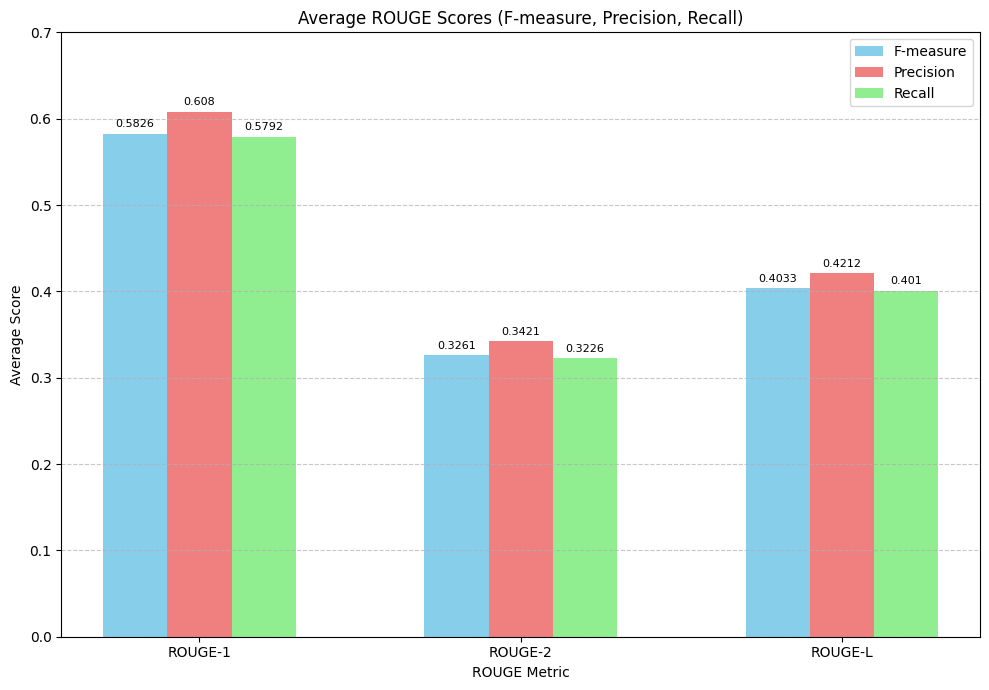

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a DataFrame for easier plotting
data = {
    'Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L'],
    'F-measure': [average_rouge1_fmeasure, average_rouge2_fmeasure, average_rougeL_fmeasure],
    'Precision': [average_rouge1_precision, average_rouge2_precision, average_rougeL_precision],
    'Recall': [average_rouge1_recall, average_rouge2_recall, average_rougeL_recall]
}
df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 7))

bar_width = 0.2
index = np.arange(len(df['Metric']))

bar1 = ax.bar(index - bar_width, df['F-measure'], bar_width, label='F-measure', color='skyblue')
bar2 = ax.bar(index, df['Precision'], bar_width, label='Precision', color='lightcoral')
bar3 = ax.bar(index + bar_width, df['Recall'], bar_width, label='Recall', color='lightgreen')

# Add the values on top of the bars
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom', fontsize=8)

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

# Add labels, title, and legend
ax.set_xlabel('ROUGE Metric')
ax.set_ylabel('Average Score')
ax.set_title('Average ROUGE Scores (F-measure, Precision, Recall)')
ax.set_xticks(index)
ax.set_xticklabels(df['Metric'], rotation=0)
ax.set_ylim(0, 0.7) # Set y-axis limit to better visualize differences
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()